In [1]:
import numpy as np
import matplotlib.pyplot as plt

from nopt.transforms.linear_transform import LinearMatrix
from nopt.transforms.fastjlt import FastJLT
from nopt.constraints.sparsity import *
from nopt.constraints.rank import *
from nopt.constraints.oblique import *
from nopt.problems.linear_problem import *
from nopt.problems.linear_problem_sum import *
from nopt.problems.principal_subspace import *
from nopt.solvers.niht import *
from nopt.solvers.naht import *
from nopt.solvers.oblique_spca import *
from nopt.tests.generate_lsmat1 import *
from nopt.tests.generate_qsmat1 import *

In [2]:
m = 100
n = 100
r = 5
rho_s = 0.2
N = 1000; # number of samples

s = round(rho_s*n)
alpha = s/(m*n)
#r = round(.5*( m+n - np.sqrt( (m+n)**2 - 4*rho_r*p ) ))

In [8]:
q0 = GenerateQSMat1((n,r), s)
q0_noise = q0 + np.random.normal(0, 1, (n, r))

theta = 1; # Signal strength
x = np.random.multivariate_normal(np.zeros((n,)), np.eye(n) + theta* q0@q0.T, N).T
#covariance matrix = x @ x.T
A = LinearMatrix(x.T / np.sqrt(N))
problem = PrincipalSubspace(A)
problem.objective(q0)

2.000000000129216
2.265957409601614e-05


-4.876860956294193

In [9]:
HTo = Oblique()

In [10]:
tmp = HTo.project(q0_noise)

In [18]:
problem.objective(HTo.project(q0_noise))

-2.619205478081488

In [19]:
solver = ObliqueSPCA(logverbosity = 2, maxiter = 10)

In [5]:
x, opt_log = solver.solve(problem)

 iter		   obj. value	    grad. norm
 iter		   cost val	    grad. norm
    1	+1.3923637163520984e+03	6.21086995e+00
    2	+3.0362783806295306e+02	4.16525064e+00
    3	+1.4071022040940096e+02	3.13976919e+00
    4	+8.4327202068142469e+01	2.49184545e+00
    5	+5.3698036628968552e+01	2.04480477e+00
    6	+3.5462137227814431e+01	1.65577284e+00
    7	+2.4270205670906414e+01	1.35153527e+00
    8	+1.6209934932055550e+01	1.12161639e+00
    9	+1.0961972718719624e+01	9.49152368e-01
   10	+7.3765072602059139e+00	7.89110379e-01
   11	+4.9718682341147948e+00	6.26171841e-01
   12	+3.2393184895515956e+00	5.08049345e-01
   13	+2.0827265532976598e+00	4.17921601e-01
   14	+1.3520795124203435e+00	3.25339821e-01
   15	+8.6628783969082679e-01	2.53928481e-01
   16	+5.4712675451674286e-01	2.07282199e-01
   17	+3.4173004835524445e-01	1.65002052e-01
   18	+2.1559155899523630e-01	1.37262973e-01
   19	+1.2804887688584790e-01	1.04067246e-01
   20	+7.5061608435763941e-02	7.87628768e-02
   21	+4.4661457460465966e-02	

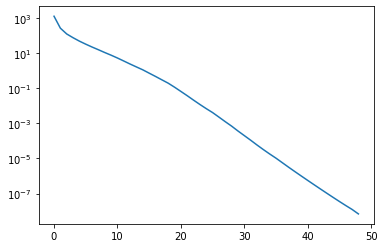

In [6]:
plt.semilogy(opt_log['iterations']['fx'])